# various CNN networks on MNIST dataset

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

# Some Defined function :- 

In [3]:
%matplotlib notebook
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(fig,x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [4]:
def train_test_epoch_plot(history):
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    # list of epoch numbers
    x = list(range(1,epochs+1))
    # print(history.history.keys())
    # dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
    # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
    # we will get val_loss and val_acc only when you pass the paramter validation_data
    # val_loss : validation loss
    # val_acc : validation accuracy
    # loss : training loss
    # acc : train accuracy
    # for each key in histrory.histrory we will have a list of length equal to number of epochs
    vy = history.history['val_loss']
    ty = history.history['loss']
    plt_dynamic(fig,x, vy, ty, ax)

In [5]:
def weight_plot(model,layeres):
    if layeres == 2:
        w_after = model.get_weights()
        h1_w = w_after[0].flatten().reshape(-1,1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        out_w = w_after[4].flatten().reshape(-1,1)
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 3, 1)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')
        plt.subplot(1, 3, 2)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        plt.subplot(1, 3, 3)
        plt.title("Trained Weights")
        ax = sns.violinplot(y=out_w,color='y')
        plt.xlabel('Output Layer ')
        plt.show()
    elif layeres == 3:
        w_after = model.get_weights()
        h1_w = w_after[0].flatten().reshape(-1,1)
        h2_w = w_after[2].flatten().reshape(-1,1)
        h3_w = w_after[4].flatten().reshape(-1,1)
        out_w = w_after[6].flatten().reshape(-1,1)
        fig = plt.figure()
        plt.title("Weight matrices after model trained")
        plt.subplot(1, 4, 1)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h1_w,color='b')
        plt.xlabel('Hidden Layer 1')
        plt.subplot(1, 4, 2)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h2_w, color='r')
        plt.xlabel('Hidden Layer 2 ')
        plt.subplot(1, 4, 3)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=h3_w, color='g')
        plt.xlabel('Hidden Layer 3 ')
        plt.subplot(1, 4, 4)
        plt.title("Trained Wt")
        ax = sns.violinplot(y=out_w,color='m')
        plt.xlabel('Output Layer ')
        plt.show()

# Parameter intialization

In [6]:
batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

# Data loading and Pre-poccessing

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#If keras will use the tensor or theano
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# Data normalization 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3-Layered CNN network :-

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 85s 1ms/step - loss: 0.5299 - acc: 0.8249 - val_loss: 0.0530 - val_acc: 0.9831
Epoch 2/15
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1236 - acc: 0.9650 - val_loss: 0.0354 - val_acc: 0.9890
Epoch 3/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0889 - acc: 0.9755 - val_loss: 0.0314 - val_acc: 0.9906
Epoch 4/15
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0730 - acc: 0.9797 - val_loss: 0.0272 - val_acc: 0.9910
Epoch 5/15
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0613 - acc: 0.9827 - val_loss: 0.0293 - val_acc: 0.9916
Epoch 6/15
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0573 - acc: 0.9846 - val_loss: 0.0251 - val_acc: 0.9921
Epoch 7/15
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0515 - acc: 0.9852 - val_loss: 0.0234 - v

<IPython.core.display.Javascript object>


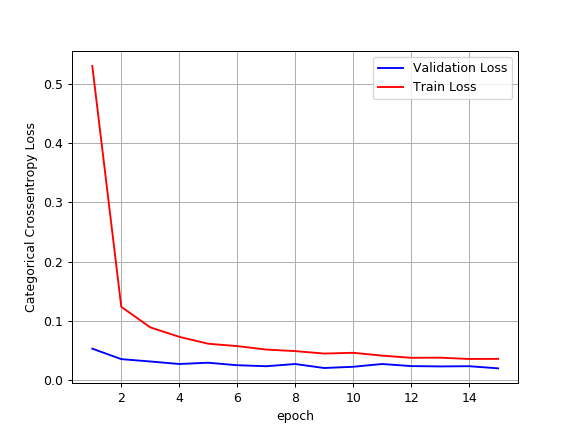

<IPython.core.display.Javascript object>


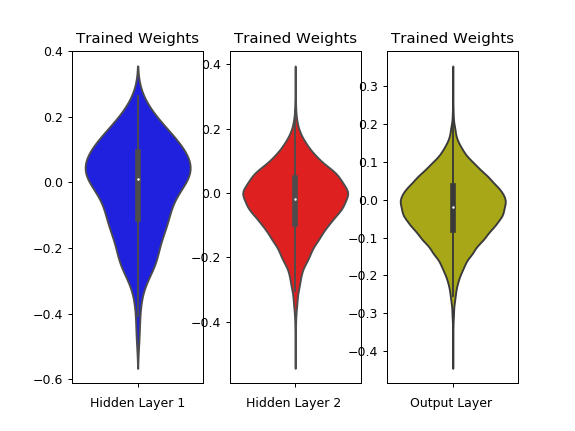

Wall time: 29min 33s


In [8]:
%%time
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))  #Subsampling
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
train_test_epoch_plot(history=history)
weight_plot(model3,layeres=2)

# 5-Layered CNN network :-

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3242 - acc: 0.8940 - val_loss: 0.0569 - val_acc: 0.9823
Epoch 2/15
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0883 - acc: 0.9736 - val_loss: 0.0353 - val_acc: 0.9894
Epoch 3/15
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0641 - acc: 0.9807 - val_loss: 0.0273 - val_acc: 0.9926
Epoch 4/15
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0531 - acc: 0.9841 - val_loss: 0.0256 - val_acc: 0.9930
Epoch 5/15
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0472 - acc: 0.9859 - val_loss: 0.0242 - val_acc: 0.9930
Epoch 6/15
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0399 - acc: 0.9882 - val_loss: 0.0230 - val_acc: 0.9931
Epoch 7/15
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0371 - acc: 0.9891 - val_loss: 0.0221 - va

<IPython.core.display.Javascript object>


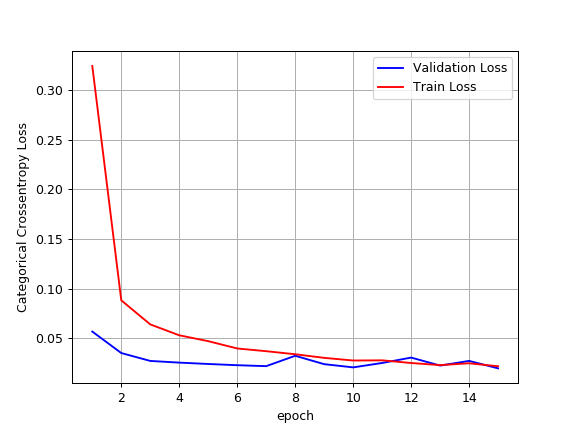

<IPython.core.display.Javascript object>


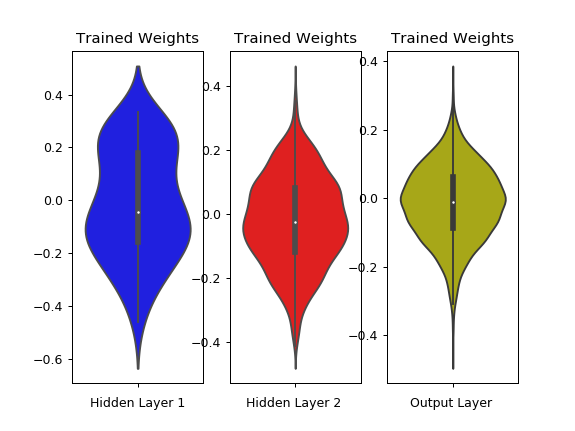

In [9]:
from keras.layers.normalization import BatchNormalization
model5 = Sequential()
model5.add(Conv2D(8, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model5.add(Conv2D(16, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling


model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))  #Subsampling
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))  #Subsampling
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
train_test_epoch_plot(history=history)
weight_plot(model5,layeres=2)

# 7-Layered CNN network with Batch Normalization and drop out :- 

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 222s 4ms/step - loss: 0.2630 - acc: 0.9204 - val_loss: 0.0749 - val_acc: 0.9763
Epoch 2/15
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0719 - acc: 0.9785 - val_loss: 0.0525 - val_acc: 0.9843
Epoch 3/15
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0541 - acc: 0.9841 - val_loss: 0.0402 - val_acc: 0.9871
Epoch 4/15
60000/60000 [==============================] - 258s 4ms/step - loss: 0.0437 - acc: 0.9870 - val_loss: 0.0382 - val_acc: 0.9878
Epoch 5/15
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0366 - acc: 0.9892 - val_loss: 0.0355 - val_acc: 0.9906
Epoch 6/15
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0316 - acc: 0.9902 - val_loss: 0.0413 - val_acc: 0.9874
Epoch 7/15
60000/60000 [==============================] - 257s 4ms/step - loss: 0.0298 - acc: 0.9909 - val_loss: 0.0354 - 

<IPython.core.display.Javascript object>


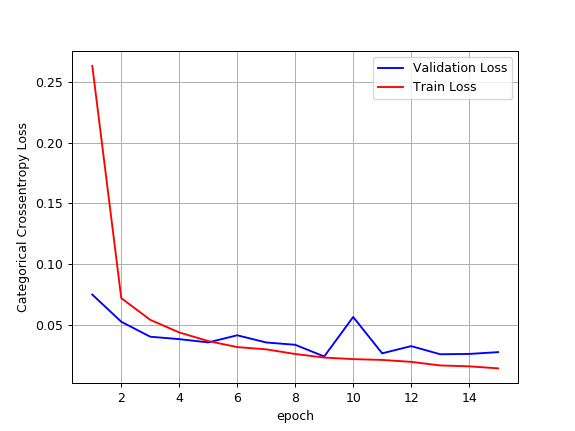

<IPython.core.display.Javascript object>


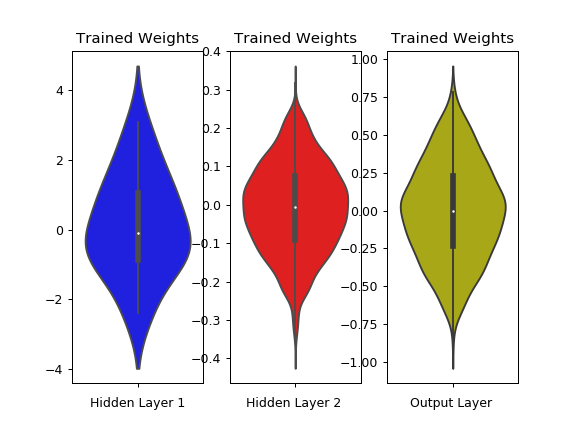

In [12]:
from keras.layers.normalization import BatchNormalization
model7 = Sequential()
model7.add(Conv2D(20, kernel_size=(1, 1),activation='relu',kernel_initializer='he_normal',padding='same'
                  ,input_shape=input_shape))
model7.add(Conv2D(20, (3, 3), activation='relu',kernel_initializer='he_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling


model7.add(Conv2D(36, (1, 1), activation='relu',kernel_initializer='he_normal',padding='same'))
model7.add(Conv2D(36, (5, 5), activation='relu',kernel_initializer='he_normal'))
#model7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling

#model7.add(Dropout(0.25))

model7.add(Conv2D(64, (1, 1), activation='relu',padding='same',kernel_initializer='he_normal'))
model7.add(Conv2D(64, (5, 5), activation='relu',kernel_initializer='he_normal'))
#model7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))  #Subsampling
model7.add(BatchNormalization())
model7.add(Dropout(0.25))

model7.add(Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_normal'))
model7.add(MaxPooling2D(pool_size=(2, 2)))  #Subsampling
model7.add(BatchNormalization())


model7.add(Flatten())
model7.add(Dense(128, activation='relu'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print(model7.summary())
print('Test loss:', score[0])
print('Test accuracy:', score[1])
train_test_epoch_plot(history=history)
weight_plot(model7,layeres=2)

# Preformance Table:-

In [2]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Algorithms", "Accuracy","Loss-epcoh plot"]

x.add_row(["3-Layered CNN", "99.32%","converging"])
x.add_row(["5-Layered CNN", "99.43%","converging"])
x.add_row(["7-Layered CNN", "99.24%","converging"])

print(x)

+---------------+----------+-----------------+
|   Algorithms  | Accuracy | Loss-epcoh plot |
+---------------+----------+-----------------+
| 3-Layered CNN |  99.32%  |    converging   |
| 5-Layered CNN |  99.43%  |    converging   |
| 7-Layered CNN |  99.24%  |    converging   |
+---------------+----------+-----------------+


# Conclusion :- 

1). The performance of standard-model networks are found higher than complex custom built architectures

2). We can found that 5 layered CNN is converging and stay converging .

3). We can found that 7 layered CNN is converging and diverging very oftnly .
